# Apply Emotion Tracker
Nov 14th 2019

Testing that the emotion tracker works for utterances in corpus.

In [8]:
# import required modules and set up environment
import os

# replace file path below with your own local convokit
os.chdir('/Users/marianneaubin/Documents/Classes/CS6742/cs6742-fork')

import convokit

from convokit import Corpus, Parser, EmoTracker, Transformer
import nltk

In [27]:
# load corpus

corpus_instance = "The_Donald"
# politics, democrats, Liberal


path = "../datasets/" + corpus_instance + "-filtered-labelled-small"
corpus = convokit.Corpus(filename=path)

In [28]:
corpus.print_summary_stats()

Number of Users: 54939
Number of Utterances: 437934
Number of Conversations: 31832


In [29]:
et = EmoTracker();
corpus = et.transform(corpus)

processed  5000 utterances 
processed  10000 utterances 
processed  15000 utterances 
processed  20000 utterances 
processed  25000 utterances 
processed  30000 utterances 
processed  35000 utterances 
processed  40000 utterances 
processed  45000 utterances 
processed  50000 utterances 
processed  55000 utterances 
processed  60000 utterances 
processed  65000 utterances 
processed  70000 utterances 
processed  75000 utterances 
processed  80000 utterances 
processed  85000 utterances 
processed  90000 utterances 
processed  95000 utterances 
processed  100000 utterances 
processed  105000 utterances 
processed  110000 utterances 
processed  115000 utterances 
processed  120000 utterances 
processed  125000 utterances 
processed  130000 utterances 
processed  135000 utterances 
processed  140000 utterances 
processed  145000 utterances 
processed  150000 utterances 
processed  155000 utterances 
processed  160000 utterances 
processed  165000 utterances 
processed  170000 utterances 


In [30]:
categories = ["sadness", "violence", "rage", "pain", "anger", "love", "politics"]
sadness_words = ["sadness", "pain", "love"]
anger_words = ["rage", "violence", "anger"]

In [31]:
def get_cat_colour(cat):
    if cat in sadness_words:
        return "teal"
    elif cat in anger_words:
        return "black"
    elif cat == "politics":
        return "grey"

{'sadness': 10237, 'violence': 33816, 'rage': 4827, 'pain': 23356, 'anger': 4725, 'love': 14079, 'politics': 18639}


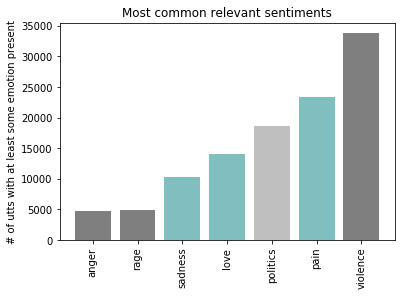

In [32]:
import matplotlib.pyplot as plt
import numpy as np

counter = 1
corpus_emo_dist_dict = {"sadness": 0, 
                       "violence":0,
                       "rage":0,
                       "pain":0,
                       "anger":0,
                       "love":0,
                       "politics":0}
for conv_id in corpus.conversations:
    conv = corpus.get_conversation(conv_id)
    for utt in conv.iter_utterances():
        if utt.meta["analysis"] != None:
            for cat in categories:
                if utt.meta["analysis"][cat] != 0.0:
                    corpus_emo_dist_dict[cat] = corpus_emo_dist_dict[cat] + 1
            counter = counter + 1
print(corpus_emo_dist_dict)

Y = []
for cat in categories:
    Y.append(corpus_emo_dist_dict[cat])
    
X = categories

idx   = np.argsort(Y)

X = np.array(X)[idx]
Y = np.array(Y)[idx]

colours = []
for cat in X:
    colours.append(get_cat_colour(cat))

plt.bar(X, Y, align='center', alpha=0.5, color=colours)
plt.xticks(X, rotation='vertical')
plt.ylabel('# of utts with at least some emotion present')
plt.title('Most common relevant sentiments')

plt.show()